In [1]:
#Handling imports
# Importing required libraries to get started
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import datasets
#Import clean dataset
dataset = pd.read_csv('data/pima_diabetes_clean.csv')
print(dataset.describe())
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]
#Import dataset with 10 percent rows replaced by noisy values
#Import dataset
dataset1 = pd.read_csv('data/pima_diabetes_25_per.csv')
print(dataset1.describe())
X1 = dataset1.iloc[:, 0:8]
y1= dataset1.iloc[:, 8]

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

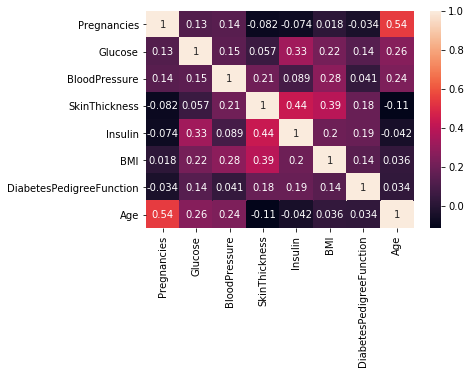

In [3]:
#Correlation Matrix of Original Dataset
sns.heatmap(X.corr(), annot = True)

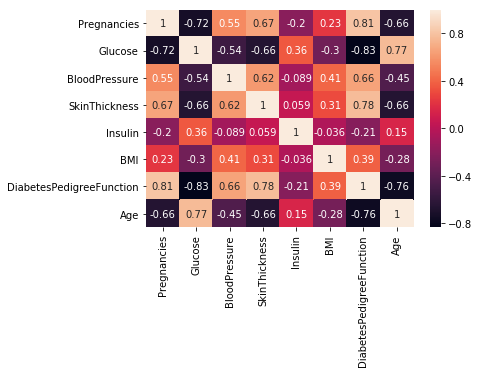

In [4]:
#Correlation Matrix of Original Dataset
sns.heatmap(X1.corr(), annot = True)

In [5]:
#Feature Extraction for original dataset
## Var[X] = p(1-p)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_filtered = sel.fit_transform(X)

print(X.head(1))
print(X_filtered[0])
#DiabetesPedigreeFunction was dropped
X = X.drop('DiabetesPedigreeFunction', axis=1)

top_4_features = SelectKBest(score_func=chi2, k=4)
X_top_4_features = top_4_features.fit_transform(X, y)
print(X.head())
print(X_top_4_features)
X = X.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
[  6.  148.   72.   35.    0.   33.6  50. ]
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age
0            6      148             72             35        0  33.6   50
1            1       85             66             29        0  26.6   31
2            8      183             64              0        0  23.3   32
3            1       89             66             23       94  28.1   21
4            0      137             40             35      168  43.1   33
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 ...
 [121.  112.   26.2  30. ]
 [126.    0.   30.1  47. ]
 [ 93.    0.   30.4  23. ]]


In [6]:
#Splitting the Original Dataset in 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

In [7]:
#Feature Scaling in the Original Dataset
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
#Feature Extraction for 10 percent noise dataset
## Var[X] = p(1-p)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_filtered_10 = sel.fit_transform(X1)

print(X1.head(1))
print(X_filtered_10[0])
#DiabetesPedigreeFunction was dropped
X1 = X1.drop('DiabetesPedigreeFunction', axis=1)

top_4_features = SelectKBest(score_func=chi2, k=4)
X_top_4_features_10 = top_4_features.fit_transform(X1, y1)
print(X1.head())
print(X_top_4_features_10)
X1 = X1.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      0.0  33.6   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0  
[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   Age
0            6    148.0           72.0           35.0      0.0  33.6  50.0
1            1     85.0           66.0           29.0      0.0  26.6  31.0
2            8    183.0           64.0            0.0      0.0  23.3  32.0
3            1     89.0           66.0           23.0     94.0  28.1  21.0
4            0    137.0           40.0           35.0    168.0  43.1  33.0
[[  6.  148.    0.   33.6]
 [  1.   85.    0.   26.6]
 [  8.  183.    0.   23.3]
 ...
 [  5.  121.  112.   26.2]
 [  1.  126.    0.   30.1]
 [  1.   93.    0.   30.4]]


In [9]:
#Splitting the 10 percent Dataset in 80:20
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X1, y1, random_state=0, test_size=0.20)

In [10]:
#Feature Scaling in the Original Dataset
sc_X_10 = StandardScaler()
X_train_10 = sc_X.fit_transform(X_train_10)
X_test_10 = sc_X.transform(X_test_10)

In [11]:
#Implement SVM with Linear Kernel using the 10 percent noisy dataset
classifier = SVC(random_state=0, kernel='rbf',probability=True)
classifier.fit(X_train_10, y_train_10)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

In [12]:
#Predict the test set results using the test set of the clean dataset
y_pred_10 = classifier.predict(X_test)

In [13]:
#Evaluate the model
cm = confusion_matrix(y_test, y_pred_10)
print (cm)
print(f1_score(y_test, y_pred_10))
print(accuracy_score(y_test, y_pred_10))

[[98  9]
 [24 23]]
0.5822784810126582
0.7857142857142857


In [16]:
#Saving the Confusion Matrix from the model evaluated and splitting into 4 variables 
# save confusion matrix and slice into four pieces
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_10)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[98  9]
 [24 23]]


In [17]:
#Steps for calculating the 
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
classifier.predict(X_test)[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [18]:
# print the first 10 predicted probabilities of class membership
classifier.predict_proba(X_test)[0:10]

array([[0.26874773, 0.73125227],
       [0.85124896, 0.14875104],
       [0.78050969, 0.21949031],
       [0.24724462, 0.75275538],
       [0.91126889, 0.08873111],
       [0.83092032, 0.16907968],
       [0.26331838, 0.73668162],
       [0.05830275, 0.94169725],
       [0.92861792, 0.07138208],
       [0.55695872, 0.44304128]])

In [19]:
# print the first 10 predicted probabilities for class 1
classifier.predict_proba(X_test)[0:10, 1]

array([0.73125227, 0.14875104, 0.21949031, 0.75275538, 0.08873111,
       0.16907968, 0.73668162, 0.94169725, 0.07138208, 0.44304128])

In [20]:
# store the predicted probabilities for class 1
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

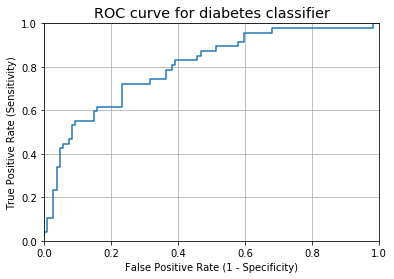

In [21]:
#Plotting ROC Curve
# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [22]:
#Finding out the AUC
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8005567707297674


In [23]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(classifier, X, y, cv=10, scoring='roc_auc').mean()

C:\Users\souro\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.6494501424501424